In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Load your dataset (update the path as needed)
df = pd.read_csv("D:\AI-ML-Internship-Tasks\Task 6-House Price Prediction\House.csv")
print(df.head())
print(df.info())

   sqft  bedrooms location   price
0  2345         3    CityA  456789
1  1500         2    CityB  312456
2  3200         4    CityC  598123
3  1800         3    CityA  389654
4  2700         5    CityB  512345
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sqft      30 non-null     int64 
 1   bedrooms  30 non-null     int64 
 2   location  30 non-null     object
 3   price     30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\YC\AppData\Local\Temp\ipykernel_22856\4269752418.py:2: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("D:\AI-ML-Internship-Tasks\Task 6-House Price Prediction\House.csv")


In [5]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['sqft', 'bedrooms', 'location', 'price'])

# Features and target
X = df[['sqft', 'bedrooms', 'location']]
y = df['price']

# Define preprocessing for numeric and categorical features
numeric_features = ['sqft', 'bedrooms']
categorical_features = ['location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft', 'bedrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location'])])),
                ('regressor', LinearRegression())])

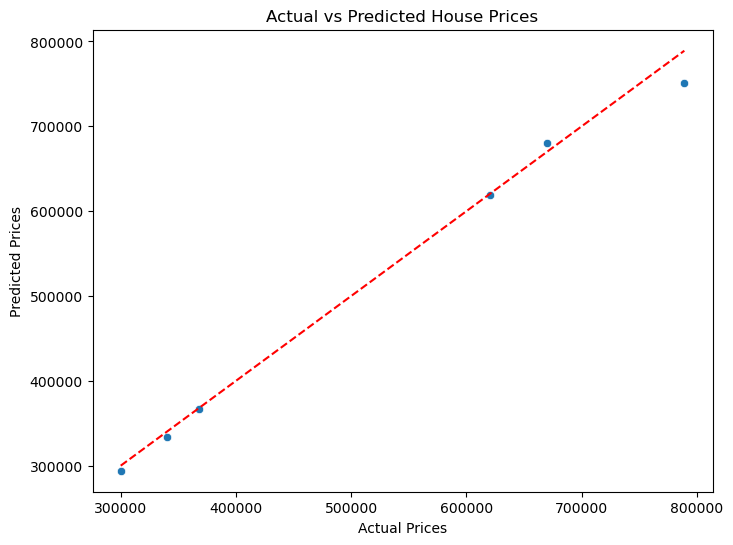

In [8]:
y_pred = model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [9]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 10579.31
Root Mean Squared Error (RMSE): 16480.62


In [10]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting MAE: {mae_gb:.2f}")
print(f"Gradient Boosting RMSE: {rmse_gb:.2f}")

Gradient Boosting MAE: 29377.02
Gradient Boosting RMSE: 44374.59
